In [34]:
# calculate all compared data for the first run of simulation
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# all indicators
# 1) loan-to-value ratio
# 2) debt-to-income ratio
# 3) debt ratio
# 4) average mortgage size
# 5) p80/p20 ratio
# 6) gini coefficient


# loan-to-value ratio
average_btl_ltv=57.8297
average_oo_ltv=81.5859
average_ltv = (average_btl_ltv+average_oo_ltv)/2

average_ltv

69.70779999999999

In [35]:
import csv

btlLTV = pd.DataFrame(columns=['btlLTV'])

with open('./2023-07-20T10-33-33.968372Z/coreIndicator-btlLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        print(len(row))
        for i in range(0, len(row)):
            btlLTV.loc[i]=float(row[i])

btlLTV       

2001


,btlLTV
0,65.6012
1,65.6012
2,65.7011
3,65.8081
4,65.8622
...,...
1996,51.1787
1997,50.5737
1998,53.2065
1999,50.4527


In [36]:
ooLTV = pd.DataFrame(columns=['ooLTV'])

with open('./2023-07-20T10-33-33.968372Z/coreIndicator-ooLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        for i in range(0, len(row)):
            ooLTV.loc[i]=float(row[i])
            
ooLTV

,ooLTV
0,77.5913
1,77.2080
2,77.1609
3,77.0440
4,76.8086
...,...
1996,83.8918
1997,84.0928
1998,84.8453
1999,84.8772


In [37]:
import csv

btlLTV = pd.DataFrame(columns=['btlLTV'])

with open('./2023-07-20T10-33-33.968372Z/coreIndicator-btlLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        print(len(row))
        for i in range(0, len(row)):
            btlLTV.loc[i]=float(row[i])

btlLTV       

2001


,btlLTV
0,65.6012
1,65.6012
2,65.7011
3,65.8081
4,65.8622
...,...
1996,51.1787
1997,50.5737
1998,53.2065
1999,50.4527


In [38]:
output = pd.read_csv('./2023-07-20T10-33-33.968372Z/Output-run1.csv',sep=';',skipinitialspace=True)
hpi=output[['Sale HPI']]
hpi

,Sale HPI
0,0.9943
1,0.9502
2,0.9793
3,0.9646
4,0.9720
...,...
1996,0.6753
1997,0.6742
1998,0.6933
1999,0.6913


In [39]:
seg = output[['Sale HPI']]
seg['btlLTV']= btlLTV
seg['ooLTV'] = ooLTV
seg

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_47031/1291547665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg['btlLTV']= btlLTV
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_47031/1291547665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg['ooLTV'] = ooLTV


,Sale HPI,btlLTV,ooLTV
0,0.9943,65.6012,77.5913
1,0.9502,65.6012,77.2080
2,0.9793,65.7011,77.1609
3,0.9646,65.8081,77.0440
4,0.9720,65.8622,76.8086
...,...,...,...
1996,0.6753,51.1787,83.8918
1997,0.6742,50.5737,84.0928
1998,0.6933,53.2065,84.8453
1999,0.6913,50.4527,84.8772


<AxesSubplot:>

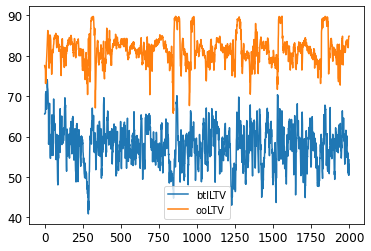

In [40]:
fig, ax = plt.subplots()

seg[['btlLTV', 'ooLTV']][:].plot(ax=ax,fontsize=12)

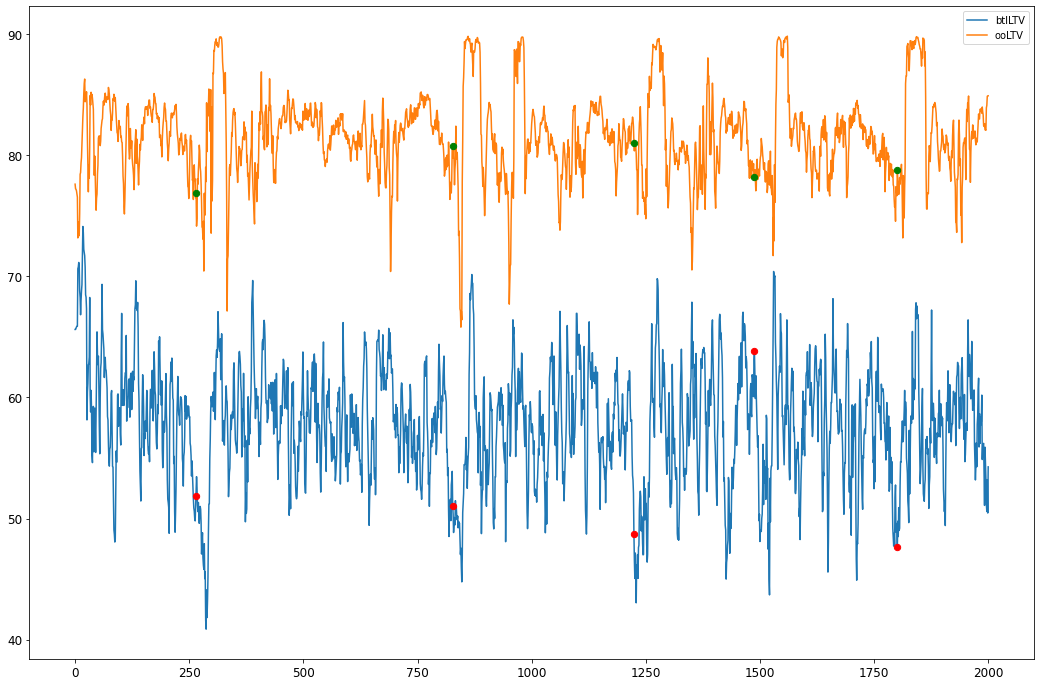

In [41]:
# 827,265,1224,1801,1488
fig, ax = plt.subplots(figsize=(18,12))

seg[['btlLTV', 'ooLTV']][:].plot(ax=ax,fontsize=12)

plt.scatter(827,btlLTV.loc[827]['btlLTV'],s=40,c='red',marker='o',zorder=2)
plt.scatter(265,btlLTV.loc[265]['btlLTV'],s=40,c='red',marker='o',zorder=2)
plt.scatter(1224,btlLTV.loc[1224]['btlLTV'],s=40,c='red',marker='o',zorder=2)
plt.scatter(1801,btlLTV.loc[1801]['btlLTV'],s=40,c='red',marker='o',zorder=2)
plt.scatter(1488,btlLTV.loc[1488]['btlLTV'],s=40,c='red',marker='o',zorder=2)

plt.scatter(827,ooLTV.loc[827]['ooLTV'],s=40,c='green',marker='o',zorder=2)
plt.scatter(265,ooLTV.loc[265]['ooLTV'],s=40,c='green',marker='o',zorder=2)
plt.scatter(1224,ooLTV.loc[1224]['ooLTV'],s=40,c='green',marker='o',zorder=2)
plt.scatter(1801,ooLTV.loc[1801]['ooLTV'],s=40,c='green',marker='o',zorder=2)
plt.scatter(1488,ooLTV.loc[1488]['ooLTV'],s=40,c='green',marker='o',zorder=2)

# ax2 = ax.twinx()
# seg[['Sale HPI']][:].plot(ax=ax2,fontsize=12)

plt.show()

In [42]:
# ooLTV在trend峰值后都存在波动下降后上升的趋势，且下降到极低后又上升到极高
# btlLTV与trend峰值没有什么明显关联
# 房市波动对oo人群影响更大

In [47]:
# loan-to-income 目前只有oolti数据，两者相减即为btl的lti数据。需要补充？

ooLTI = pd.DataFrame(columns=['ooLTI'])

with open('./2023-07-20T10-33-33.968372Z/coreIndicator-ooLTI.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        for i in range(0, len(row)):
            ooLTI.loc[i]=float(row[i])

ooLTI 

,ooLTI
0,2.9633
1,2.9461
2,2.9738
3,2.9676
4,2.9662
...,...
1996,3.9454
1997,4.0298
1998,4.0211
1999,3.9718


In [48]:
# debt to income
total_DTI = pd.DataFrame(columns=['DTI'])

with open('./2023-07-20T10-33-33.968372Z/coreIndicator-debtToIncome.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        for i in range(0, len(row)):
            total_DTI.loc[i]=float(row[i])

total_DTI

,DTI
0,32.9002
1,32.9201
2,34.9557
3,35.6473
4,36.2154
...,...
1996,93.4684
1997,93.3471
1998,93.9371
1999,93.8688


In [49]:
oo_DTI = pd.DataFrame(columns=['ooDTI'])

with open('./2023-07-20T10-33-33.968372Z/coreIndicator-ooDebtToIncome.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        for i in range(0, len(row)):
            oo_DTI.loc[i]=float(row[i])

oo_DTI

,ooDTI
0,19.4049
1,19.4264
2,21.2081
3,21.7147
4,22.1044
...,...
1996,66.9920
1997,67.0158
1998,67.5192
1999,67.5030


In [51]:
dti_table = total_DTI[['DTI']]
dti_table['ooDTI']= oo_DTI['ooDTI']
dti_table['btlDTI']=dti_table['DTI'] - dti_table['ooDTI']
dti_table

,DTI,ooDTI,btlDTI
0,32.9002,19.4049,13.4953
1,32.9201,19.4264,13.4937
2,34.9557,21.2081,13.7476
3,35.6473,21.7147,13.9326
4,36.2154,22.1044,14.1110
...,...,...,...
1996,93.4684,66.9920,26.4764
1997,93.3471,67.0158,26.3313
1998,93.9371,67.5192,26.4179
1999,93.8688,67.5030,26.3658


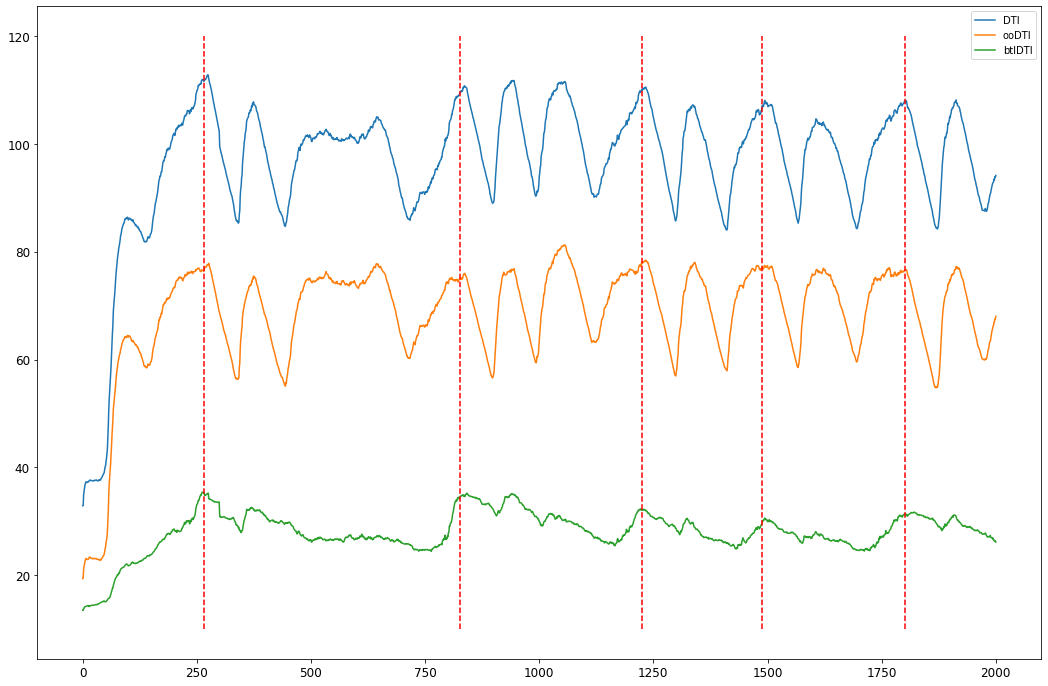

In [56]:
# 827,265,1224,1801,1488
fig3, ax3 = plt.subplots(figsize=(18,12))

dti_table[['DTI','ooDTI','btlDTI']][:].plot(ax=ax3,fontsize=12)

plt.vlines(827, ymin=10,ymax=120,ls='--',color='red',label='tops')
plt.vlines(265, ymin=10,ymax=120,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=10,ymax=120,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=10,ymax=120,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=10,ymax=120,ls='--',color='red',label='tops')
#plt.scatter(827,ooLTI.loc[827]['ooLTI'],s=40,c='red',marker='o',zorder=2)
#plt.scatter(265,ooLTI.loc[265]['ooLTI'],s=40,c='red',marker='o',zorder=2)
#plt.scatter(1224,ooLTI.loc[1224]['ooLTI'],s=40,c='red',marker='o',zorder=2)
#plt.scatter(1801,ooLTI.loc[1801]['ooLTI'],s=40,c='red',marker='o',zorder=2)
#plt.scatter(1488,ooLTI.loc[1488]['ooLTI'],s=40,c='red',marker='o',zorder=2)

plt.show()

In [81]:
# debt ratio 
num_HM = pd.DataFrame(columns=['numHM'])


In [82]:
saleTransaction = pd.read_csv('./2023-07-20T10-33-33.968372Z/SaleTransactions-run1.csv',sep=';',skipinitialspace=True)
saleTransaction.shape

(39192, 30)

In [83]:
# monthly transaction number with mortgage
loan_data = saleTransaction[(saleTransaction.buyerHasBTLGene == False) & 
                (saleTransaction.firstTimeBuyerMortgage == False) & (saleTransaction.mortgagePrincipal != 0)]

loan_data.shape

(6628, 30)

In [84]:
initial = np.zeros((2001,3))
HM_loan_table = pd.DataFrame(initial,columns=['loan', 'nonLoan', 'loanRatio'])

In [85]:
# monthly transaction number without mortgage
non_loan_data = saleTransaction[(saleTransaction.buyerHasBTLGene == False) & 
                (saleTransaction.firstTimeBuyerMortgage == False) & (saleTransaction.mortgagePrincipal == 0)]

non_loan_data.shape

(12960, 30)

In [86]:
c_modelTime = -1 
count = 0

for index,row in loan_data.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            HM_loan_table.loc[[row['modelTime']],['loan']] = count
         
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1

HM_loan_table 

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1996,4.0,0.0,0.0
1997,12.0,0.0,0.0
1998,7.0,0.0,0.0
1999,7.0,0.0,0.0


In [87]:
c_modelTime = -1
count = 0

for index,row in non_loan_data.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            HM_loan_table.loc[[row['modelTime']],['nonLoan']] = count
       
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1


HM_loan_table    

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1996,4.0,12.0,0.0
1997,12.0,17.0,0.0
1998,7.0,18.0,0.0
1999,7.0,8.0,0.0


In [88]:
# loan ratio
for index,row in HM_loan_table.iterrows():
    if (row['loan'] + row['nonLoan'] != 0):
        HM_loan_table.loc[[index],['loanRatio']] = row['loan'] / (row['loan'] + row['nonLoan'])

HM_loan_table

,loan,nonLoan,loanRatio
0,0.0,0.0,0.000000
1,0.0,0.0,0.000000
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,0.0,0.0,0.000000
...,...,...,...
1996,4.0,12.0,0.250000
1997,12.0,17.0,0.413793
1998,7.0,18.0,0.280000
1999,7.0,8.0,0.466667


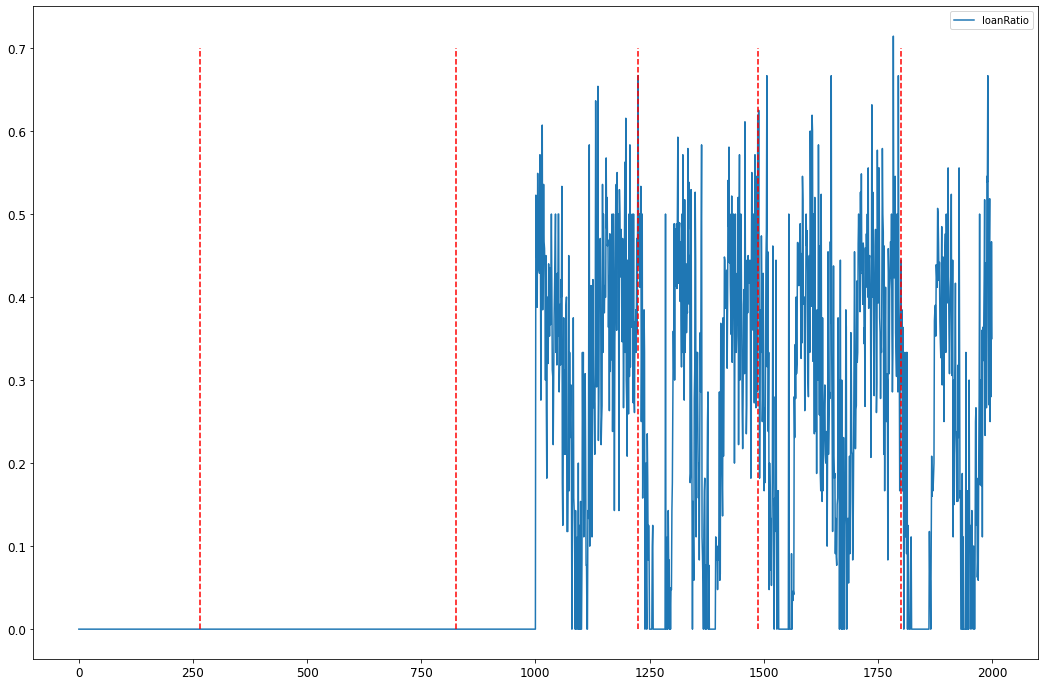

In [91]:
fig, ax = plt.subplots(figsize=(18,12))
HM_loan_table[['loanRatio']][:].plot(ax=ax,fontsize=12)
plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.show()


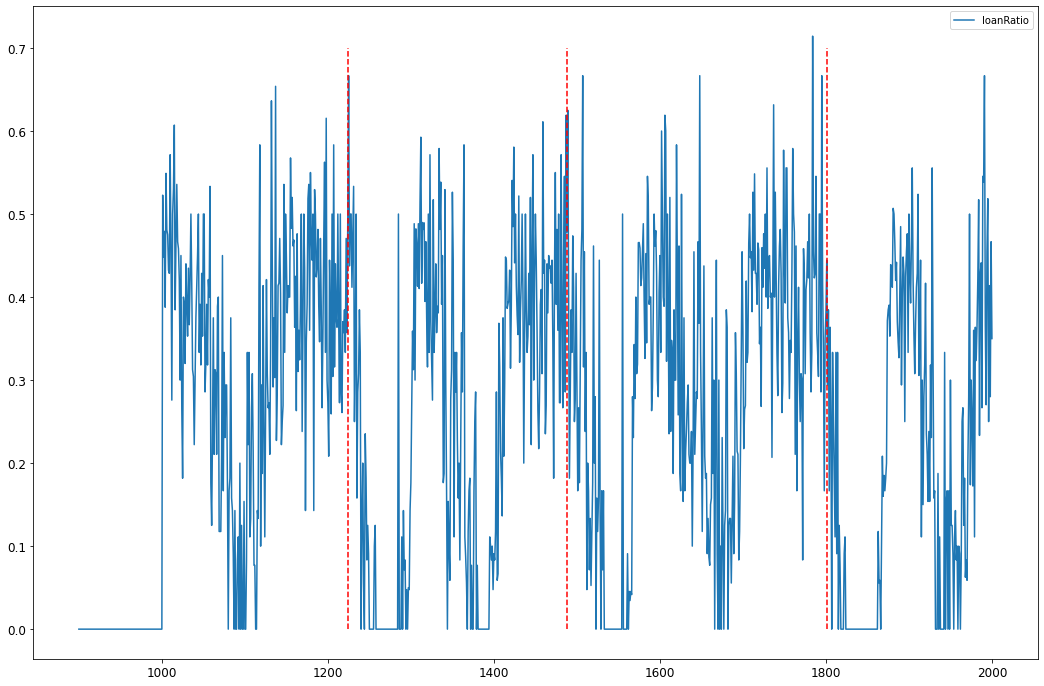

In [93]:
fig, ax = plt.subplots(figsize=(18,12))
HM_loan_table[['loanRatio']][900:].plot(ax=ax,fontsize=12)
#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.show()

In [94]:
# debt ratio 办理了贷款的人群占该人群总人数比例 oo群体，办理贷款人群=办理贷款的数量
# 每个月FTB群体获批贷款数量 = FTB群体中获得贷款的家庭数量
num_FTB = pd.DataFrame(columns=['numFTB'])

#with open('./2023-07-20T10-33-33.968372Z/coreIndicator-advancesToFTB.csv', 'r') as file:
#    csvreader = csv.reader(file, delimiter=';')
#    for row in csvreader:
#        for i in range(0, len(row)):
#            num_FTB.loc[i]=int(row[i])

num_FTB

,numFTB


In [97]:
FTB_loan_table = pd.DataFrame(np.zeros((2001,3)),columns=['loan', 'nonLoan', 'loanRatio'])

FTB_loan_table

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1996,0.0,0.0,0.0
1997,0.0,0.0,0.0
1998,0.0,0.0,0.0
1999,0.0,0.0,0.0


In [98]:
# monthly transactions of FIRST TIME BUYER without mortgage
non_loan_FTB = saleTransaction[(saleTransaction.firstTimeBuyerMortgage == True) & (saleTransaction.mortgagePrincipal == 0)]

non_loan_FTB.shape

(1392, 30)

In [99]:
c_modelTime = -1  
count = 0

for index,row in non_loan_FTB.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            FTB_loan_table.loc[[row['modelTime']],['nonLoan']] = count
           
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1


FTB_loan_table    

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1996,0.0,1.0,0.0
1997,0.0,1.0,0.0
1998,0.0,1.0,0.0
1999,0.0,3.0,0.0


In [104]:
loan_FTB = saleTransaction[(saleTransaction.firstTimeBuyerMortgage == True) & (saleTransaction.mortgagePrincipal != 0)]

loan_FTB.shape

(9090, 30)

In [105]:
c_modelTime = -1  
count = 0

for index,row in loan_FTB.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            FTB_loan_table.loc[[row['modelTime']],['loan']] = count
        
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            count +=1


FTB_loan_table   

,loan,nonLoan,loanRatio
0,0.0,0.0,0.000000
1,0.0,0.0,0.000000
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,0.0,0.0,0.000000
...,...,...,...
1996,15.0,1.0,0.937500
1997,18.0,1.0,0.947368
1998,9.0,1.0,0.900000
1999,18.0,3.0,0.857143


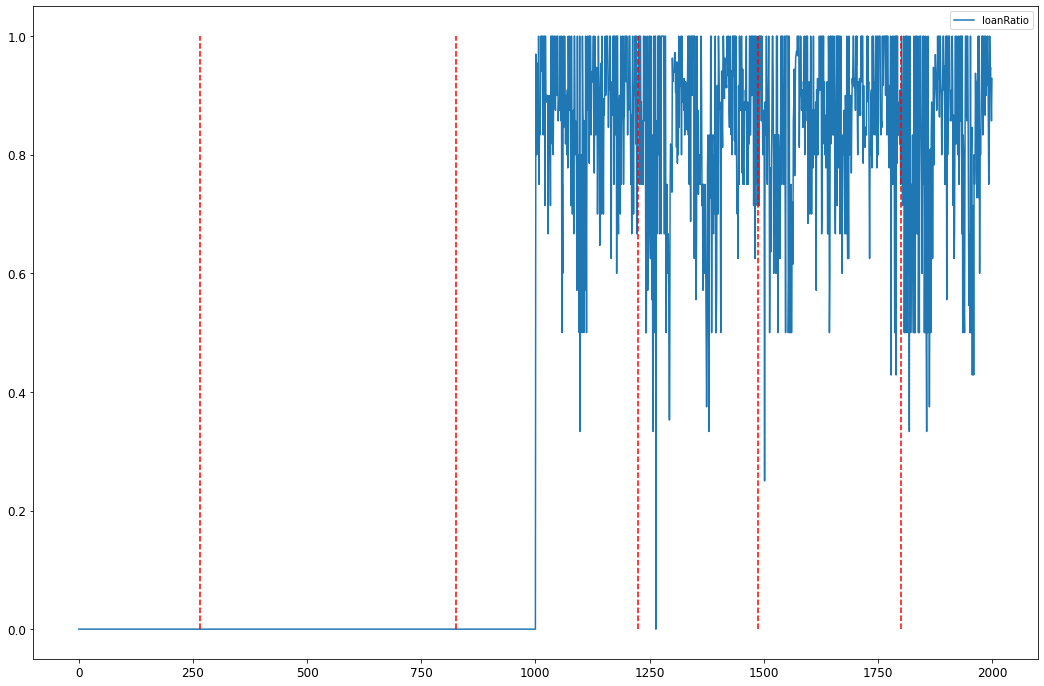

In [113]:
# loan ratio
for index,row in FTB_loan_table.iterrows():
    if (row['loan'] + row['nonLoan'] != 0):
        FTB_loan_table.loc[[index],['loanRatio']] = row['loan'] / (row['loan'] + row['nonLoan'])
        
        
fig, ax = plt.subplots(figsize=(18,12))
FTB_loan_table[['loanRatio']][:].plot(ax=ax,fontsize=12)
plt.vlines(827, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(265, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.show()

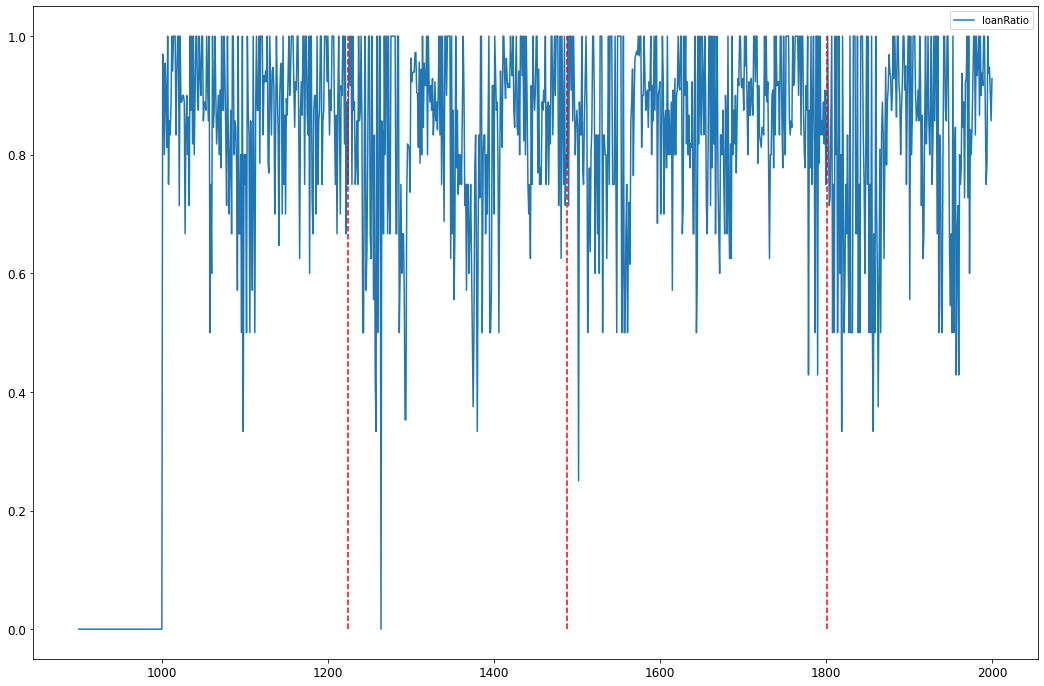

In [114]:
fig, ax = plt.subplots(figsize=(18,12))
FTB_loan_table[['loanRatio']][900:].plot(ax=ax,fontsize=12)
#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.show()

In [110]:
# buy to let  loan ratio
# non loan btl number
non_loan_BTL = saleTransaction[(saleTransaction.buyerHasBTLGene == True)
                               & (saleTransaction.firstTimeBuyerMortgage == False) & (saleTransaction.mortgagePrincipal == 0)]

non_loan_BTL.shape

(4319, 30)

In [111]:
BTL_loan_table = pd.DataFrame(np.zeros((2001,3)),columns=['loan', 'nonLoan', 'loanRatio'])

c_modelTime = -1 
count = 0

for index,row in non_loan_BTL.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            BTL_loan_table.loc[[row['modelTime']],['nonLoan']] = count
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] # 初次进入遍历
            count +=1


BTL_loan_table   

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1996,0.0,2.0,0.0
1997,0.0,6.0,0.0
1998,0.0,5.0,0.0
1999,0.0,6.0,0.0


In [112]:
loan_BTL = saleTransaction[(saleTransaction.buyerHasBTLGene == True)
                               & (saleTransaction.firstTimeBuyerMortgage == False) & (saleTransaction.mortgagePrincipal != 0)]

c_modelTime = -1 
count = 0

for index,row in loan_BTL.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            BTL_loan_table.loc[[row['modelTime']],['loan']] = count
       
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1


BTL_loan_table  

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1996,2.0,2.0,0.0
1997,1.0,6.0,0.0
1998,4.0,5.0,0.0
1999,6.0,6.0,0.0


In [115]:
# loan ratio
for index,row in BTL_loan_table.iterrows():
    if (row['loan'] + row['nonLoan'] != 0):
        BTL_loan_table.loc[[index],['loanRatio']] = row['loan'] / (row['loan'] + row['nonLoan'])
        
BTL_loan_table

,loan,nonLoan,loanRatio
0,0.0,0.0,0.000000
1,0.0,0.0,0.000000
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,0.0,0.0,0.000000
...,...,...,...
1996,2.0,2.0,0.500000
1997,1.0,6.0,0.142857
1998,4.0,5.0,0.444444
1999,6.0,6.0,0.500000


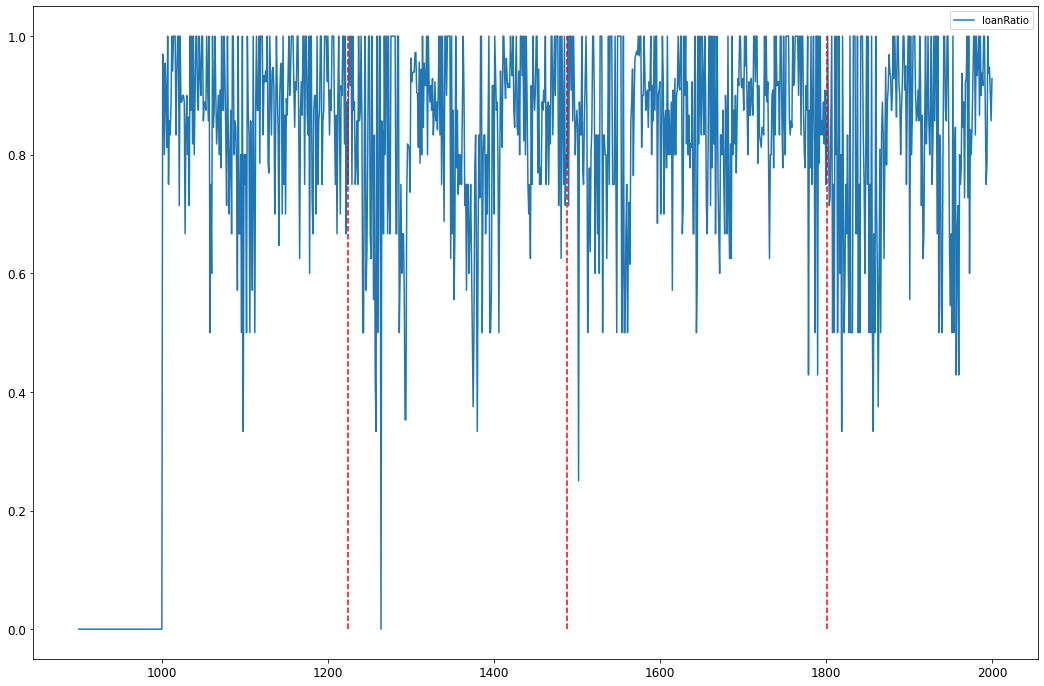

In [116]:
fig, ax = plt.subplots(figsize=(18,12))
FTB_loan_table[['loanRatio']][900:].plot(ax=ax,fontsize=12)
#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=1,ls='--',color='red',label='tops')
plt.show()

In [117]:
# average mortgage size
# average value of mortgage principle

HM_loan_table['mortgageSum'] = 0
HM_loan_table

,loan,nonLoan,loanRatio,mortgageSum
0,0.0,0.0,0.000000,0
1,0.0,0.0,0.000000,0
2,0.0,0.0,0.000000,0
3,0.0,0.0,0.000000,0
4,0.0,0.0,0.000000,0
...,...,...,...,...
1996,4.0,12.0,0.250000,0
1997,12.0,17.0,0.413793,0
1998,7.0,18.0,0.280000,0
1999,7.0,8.0,0.466667,0


In [118]:
modelTime = -1 
sum_ = 0

for index,row in loan_data.iterrows():
    if (row['modelTime'] == modelTime):
        sum_ +=row['mortgagePrincipal']
    else: 
        if (modelTime != -1):
            HM_loan_table.loc[[row['modelTime']],['mortgageSum']] = sum_
    
            sum_ = row['mortgagePrincipal']
            modelTime = row['modelTime']
        else:
            modelTime = row['modelTime'] 
            sum_ +=row['mortgagePrincipal']

HM_loan_table

,loan,nonLoan,loanRatio,mortgageSum
0,0.0,0.0,0.000000,0.00
1,0.0,0.0,0.000000,0.00
2,0.0,0.0,0.000000,0.00
3,0.0,0.0,0.000000,0.00
4,0.0,0.0,0.000000,0.00
...,...,...,...,...
1996,4.0,12.0,0.250000,332763.73
1997,12.0,17.0,0.413793,1857929.50
1998,7.0,18.0,0.280000,722482.80
1999,7.0,8.0,0.466667,1127293.96


In [124]:
HM_loan_table['AMS'] = 0 # average mortgage size 

for index,row in HM_loan_table.iterrows():
    if (row['loan'] != 0):
        HM_loan_table.loc[[index],['AMS']] = row['mortgageSum'] / row['loan']


HM_loan_table

,loan,nonLoan,loanRatio,mortgageSum,AMS
0,0.0,0.0,0.000000,0.00,0.000000
1,0.0,0.0,0.000000,0.00,0.000000
2,0.0,0.0,0.000000,0.00,0.000000
3,0.0,0.0,0.000000,0.00,0.000000
4,0.0,0.0,0.000000,0.00,0.000000
...,...,...,...,...,...
1996,4.0,12.0,0.250000,332763.73,83190.932500
1997,12.0,17.0,0.413793,1857929.50,154827.458333
1998,7.0,18.0,0.280000,722482.80,103211.828571
1999,7.0,8.0,0.466667,1127293.96,161041.994286


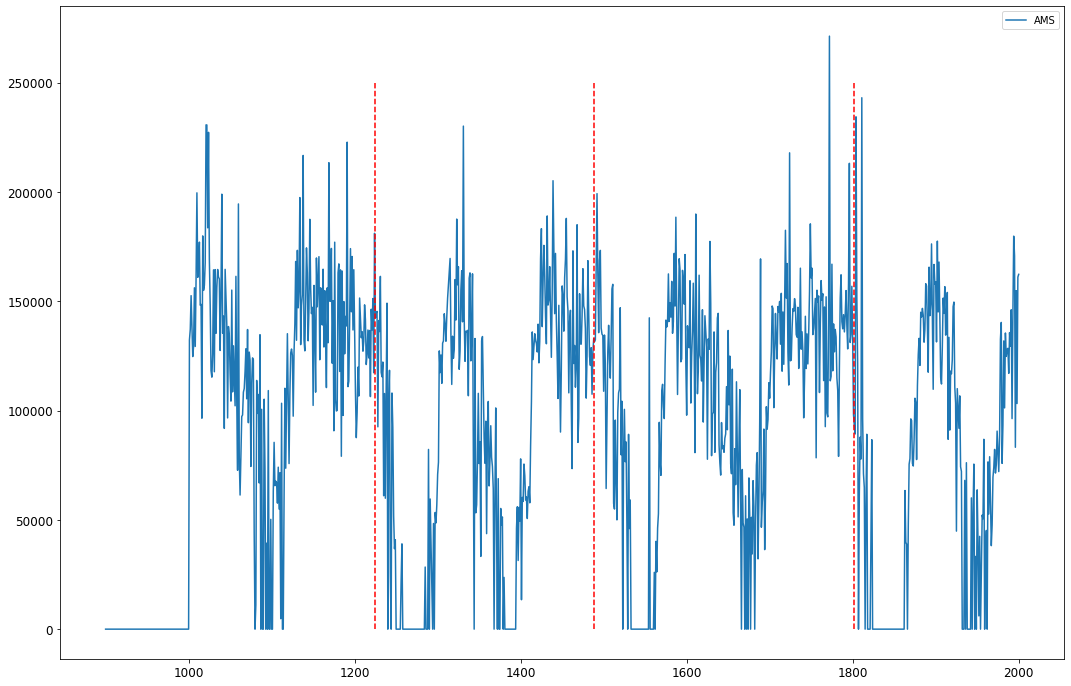

In [122]:
fig, ax = plt.subplots(figsize=(18,12))
HM_loan_table[['AMS']][900:].plot(ax=ax,fontsize=12)
#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=250000,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=250000,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=250000,ls='--',color='red',label='tops')
plt.show()

In [125]:
# ftb's ams
FTB_loan_table['mortgageSum'] = 0

modelTime = -1
sum_ = 0

for index,row in loan_FTB.iterrows():
    if (row['modelTime'] == modelTime):
        sum_ +=row['mortgagePrincipal']
    else: 
        if (modelTime != -1):
            FTB_loan_table.loc[[row['modelTime']],['mortgageSum']] = sum_
   
            sum_ = row['mortgagePrincipal']
            modelTime = row['modelTime']
        else:
            modelTime = row['modelTime'] 
            sum_ +=row['mortgagePrincipal']
            
            
FTB_loan_table['AMS'] = 0 

for index,row in FTB_loan_table.iterrows():
    if (row['loan'] != 0):
        FTB_loan_table.loc[[index],['AMS']] = row['mortgageSum'] / row['loan']
        
FTB_loan_table

,loan,nonLoan,loanRatio,mortgageSum,AMS
0,0.0,0.0,0.000000,0.00,0.000000
1,0.0,0.0,0.000000,0.00,0.000000
2,0.0,0.0,0.000000,0.00,0.000000
3,0.0,0.0,0.000000,0.00,0.000000
4,0.0,0.0,0.000000,0.00,0.000000
...,...,...,...,...,...
1996,15.0,1.0,0.937500,1841292.65,122752.843333
1997,18.0,1.0,0.947368,2187914.52,121550.806667
1998,9.0,1.0,0.900000,1049072.54,116563.615556
1999,18.0,3.0,0.857143,2338654.16,129925.231111


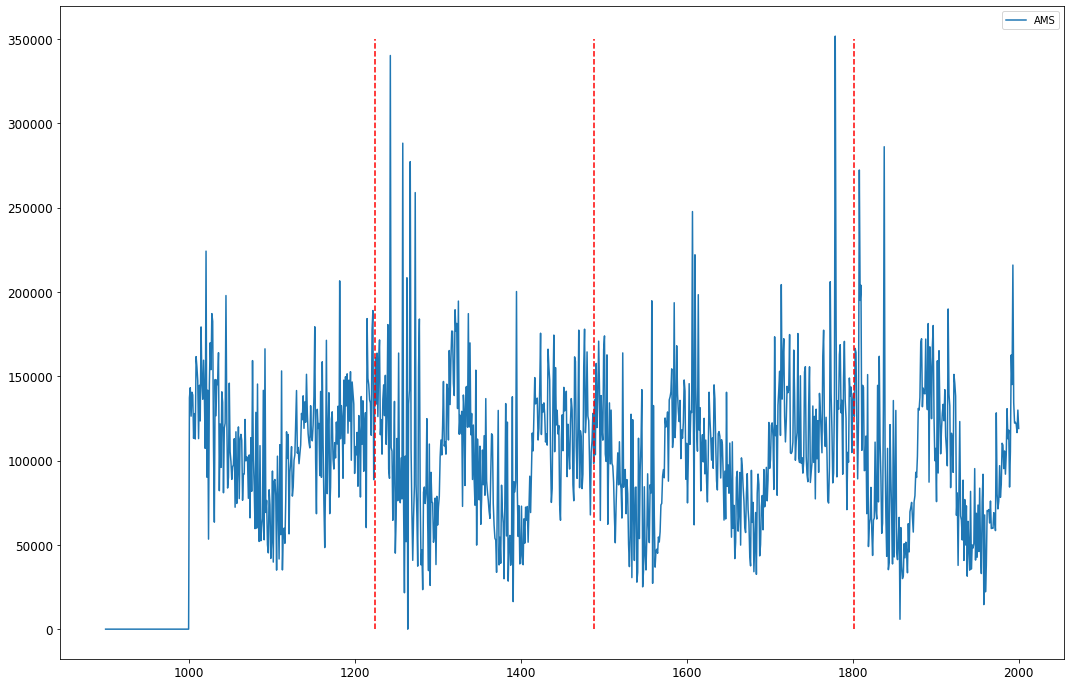

In [127]:
fig, ax = plt.subplots(figsize=(18,12))
FTB_loan_table[['AMS']][900:].plot(ax=ax,fontsize=12)
#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=350000,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=350000,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=350000,ls='--',color='red',label='tops')
plt.show()

In [129]:
# calculate btl ams
BTL_loan_table['mortgageSum'] = 0

modelTime = -1  
sum_ = 0

for index,row in loan_BTL.iterrows():
    if (row['modelTime'] == modelTime):
        sum_ +=row['mortgagePrincipal']
    else: 
    
        if (modelTime != -1):

            BTL_loan_table.loc[[row['modelTime']],['mortgageSum']] = sum_
       
            sum_ = row['mortgagePrincipal']
            modelTime = row['modelTime']
        else:
            modelTime = row['modelTime']
            sum_ +=row['mortgagePrincipal']
            
            
BTL_loan_table['AMS'] = 0 

for index,row in BTL_loan_table.iterrows():
    if (row['loan'] != 0):
        BTL_loan_table.loc[[index],['AMS']] = row['mortgageSum'] / row['loan']
        
BTL_loan_table

,loan,nonLoan,loanRatio,mortgageSum,AMS
0,0.0,0.0,0.000000,0.00,0.000000
1,0.0,0.0,0.000000,0.00,0.000000
2,0.0,0.0,0.000000,0.00,0.000000
3,0.0,0.0,0.000000,0.00,0.000000
4,0.0,0.0,0.000000,0.00,0.000000
...,...,...,...,...,...
1996,2.0,2.0,0.500000,298862.86,149431.430000
1997,1.0,6.0,0.142857,99627.60,99627.600000
1998,4.0,5.0,0.444444,219545.61,54886.402500
1999,6.0,6.0,0.500000,624327.23,104054.538333


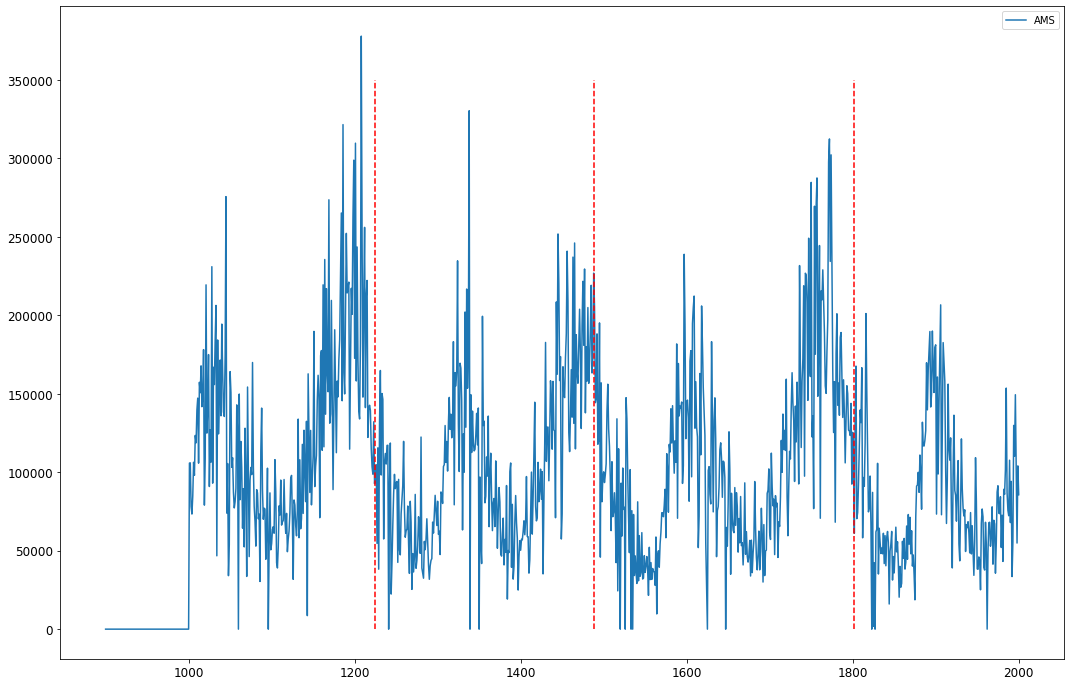

In [131]:
fig, ax = plt.subplots(figsize=(18,12))
BTL_loan_table[['AMS']][900:].plot(ax=ax,fontsize=12)
#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops')
plt.vlines(1224, ymin=0,ymax=350000,ls='--',color='red',label='tops')
plt.vlines(1801, ymin=0,ymax=350000,ls='--',color='red',label='tops')
plt.vlines(1488, ymin=0,ymax=350000,ls='--',color='red',label='tops')
plt.show()

In [214]:
# p80/p20 ratio

raw_data

step = 0

with open('./2023-07-20T10-33-33.968372Z/HousingWealth-run1.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        c_array=[]
        for i in range(0, len(row)):
            c_array.append(float(row[i]))
        
        c_array.sort()
        c_series = pd.Series(c_array)
        
        if (step == 0):
            raw_data= pd.DataFrame(c_series)
        else:
            raw_data = pd.concat([raw_data,c_series],axis=1)
        
        step +=1  

outpath = 'test_output_run1_p80_p20_5.csv'
raw_data.to_csv(outpath,sep=';',index=False,header=True)

In [217]:
raw_data.head(3)

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-102135.36,-65705.91,-46314.85,-25454.01,-70763.22,-70195.15,-61600.02,-66186.90,-72735.09,-73942.03,...,-35990.49,-33615.34,-12579.86,-19989.42,-35057.62,-43830.21,-56296.80,-53931.83,-47156.40,-48021.78
1,-101412.57,-59462.21,-38300.24,-16887.74,-12332.09,-12223.96,-16563.09,-19898.48,-26035.02,-27573.22,...,-32875.20,-11480.24,-604.87,-9563.09,-24517.50,-38666.43,-41506.10,-43415.89,-37675.43,-43846.18
2,-95642.09,-42008.55,-24124.83,-4612.52,-6975.78,-8258.29,-6928.60,-12327.78,-19021.16,-21017.17,...,-32531.10,-10096.59,-158.79,-4605.88,-11965.30,-26960.75,-40427.82,-39272.22,-35819.82,-35241.35


In [240]:
import math

p80_p20_table = pd.DataFrame(columns=['p80_index','p80_value','p20_index','p20_value'])

index_ = 0
for key,col in raw_data.iteritems():
    filtered = col[col[:].notna()]
    len_ = len(filtered)
    # print(len(filtered))
    index_80 = round(len_ * 0.8) - 1
    index_20 = round(len_ * 0.2) - 1
    #print(col[index_20])
    p80_p20_table.loc[index_] = [index_80,col[index_80],index_20,col[index_20]]
    if (col[index_20] != 0):
        p80_p20_table.loc[[index_],['P80/P20 Ratio']] = col[index_80] / col[index_20]  
    index_ +=1
    #print(key)
      
p80_p20_table

,p80_index,p80_value,p20_index,p20_value
0,8006.0,140103.77,2001.0,0.0
1,8003.0,184706.00,2000.0,0.0
2,8005.0,199566.24,2000.0,0.0
3,8007.0,220199.41,2001.0,0.0
4,8006.0,221010.06,2001.0,0.0
...,...,...,...,...
79,8008.0,182211.29,2001.0,0.0
80,8005.0,160972.83,2001.0,0.0
81,8001.0,158888.63,2000.0,0.0
82,8009.0,156705.80,2001.0,0.0


<AxesSubplot:>

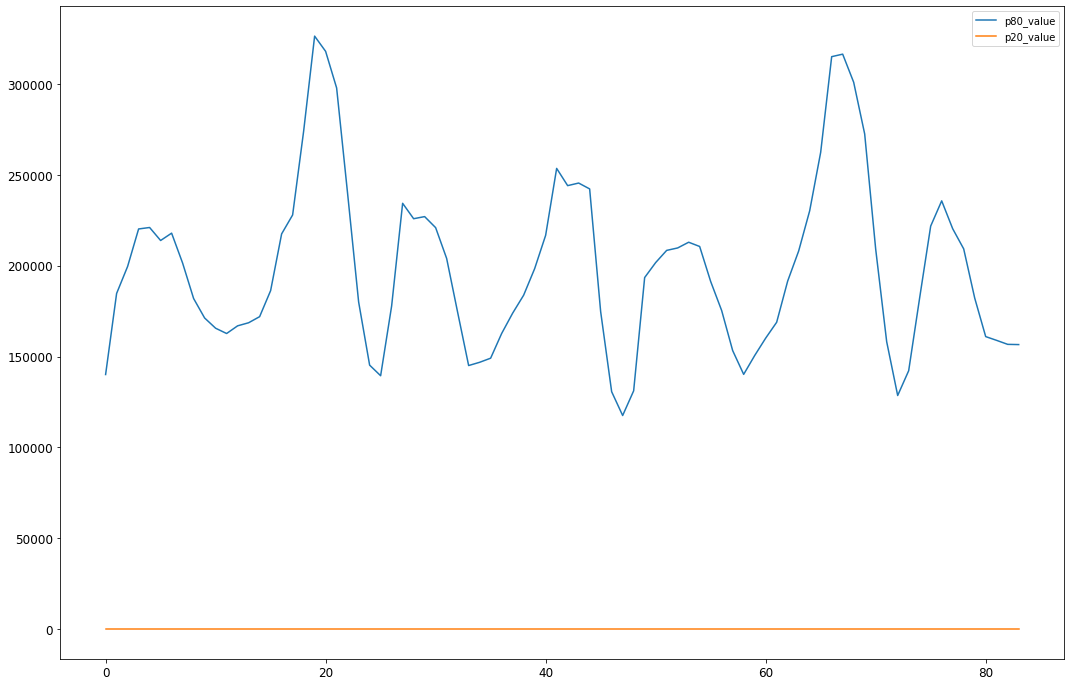

In [241]:
fig, ax = plt.subplots(figsize=(18,12))
p80_p20_table[['p80_value','p20_value']][:].plot(ax=ax,fontsize=12)

In [243]:
def gini(x):
    total = 0
    for i,xi in enumerate(x[:-1],1):
        total += np.sum(np.abs(xi - x[i:]))
        
    return total/(len(x)**2 * np.mean(x))

index_ = 0
for key,col in raw_data.iteritems():
    filtered = col[col[:].notna()]
    gini_ = gini(filtered)
    # print(gini_)
    p80_p20_table.loc[[index_],['Gini Coefficient']] = gini_
    index_ +=1
    #index_80 = round(len_ * 0.8) - 1
    #index_20 = round(len_ * 0.2) - 1
    #print(col[index_20])
    #p80_p20_table.loc[index_] = [index_80,col[index_80],index_20,col[index_20]]
    #if (col[index_20] != 0):
        #p80_p20_table.loc[[index_],['P80/P20 Ratio']] = col[index_80] / col[index_20]  
    
    #print(key)
p80_p20_table

,p80_index,p80_value,p20_index,p20_value,Gini Coefficient
0,8006.0,140103.77,2001.0,0.0,0.717079
1,8003.0,184706.00,2000.0,0.0,0.684829
2,8005.0,199566.24,2000.0,0.0,0.678318
3,8007.0,220199.41,2001.0,0.0,0.672828
4,8006.0,221010.06,2001.0,0.0,0.671674
...,...,...,...,...,...
79,8008.0,182211.29,2001.0,0.0,0.700094
80,8005.0,160972.83,2001.0,0.0,0.707122
81,8001.0,158888.63,2000.0,0.0,0.709097
82,8009.0,156705.80,2001.0,0.0,0.704802


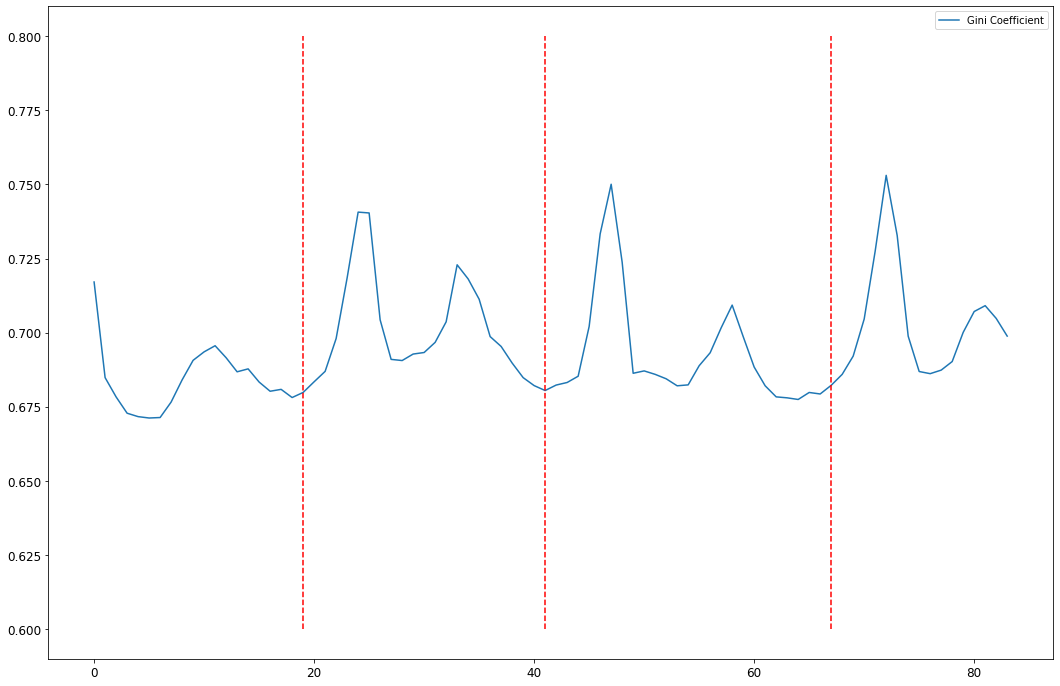

In [246]:
fig, ax = plt.subplots(figsize=(18,12))
p80_p20_table[['Gini Coefficient']][:].plot(ax=ax,fontsize=12)

#plt.vlines(827, ymin=0,ymax=0.7,ls='--',color='red',label='tops') # 827 -1000 /12 = 68.91 -
#plt.vlines(265, ymin=0,ymax=0.7,ls='--',color='red',label='tops') # 265 - 1000 /12=22 -
plt.vlines(19, ymin=0.6,ymax=0.8,ls='--',color='red',label='tops') #(1224 -1000)/12=102 18.7
plt.vlines(67, ymin=0.6,ymax=0.8,ls='--',color='red',label='tops') #(1801-1000)/12=150  66.75
plt.vlines(41, ymin=0.6,ymax=0.8,ls='--',color='red',label='tops') # (1488-1000)/12=124  40.7
plt.show()